In [112]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import heapq

df = pd.read_csv('./data.csv', dtype={"Topic": str}, low_memory=False)

year_columns = [col for col in df.columns if col.isdigit()]

df_long = df.melt(id_vars=["Country Name", "Indicator Name", "Topic", "Indicator Code"], value_vars=year_columns, var_name="Year", value_name="Value")
df_long["Year"] = df_long["Year"].astype(int)

# Pivot table to align indicators as columns
df_pivot = df_long.pivot_table(index=["Country Name", "Year"], columns="Indicator Name", values="Value").reset_index()
topics = [col for col in df_pivot.columns if col not in ["Country Name", "Year", "Indicator Code", "Topic"]]
top_models = []

# for target_var in topics:
target_var = "Multidimensional poverty headcount ratio (UNDP) (% of population)"
    # Drop rows where target variable is missing
new_df_pivot = df_pivot.dropna(subset=[target_var])

independent_vars = [col for col in new_df_pivot.columns if col not in ["Country Name", "Year", target_var, "Indicator Code", "Topic"]]
print(independent_vars)

for ind_var in independent_vars:    
    X = new_df_pivot[ind_var]
    X = np.sign(X) * np.log1p(np.abs(X))
    y = new_df_pivot[target_var]

    # Add an intercept for regression
    X = sm.add_constant(X)
    X = X.dropna()
    y = y.loc[X.index]
    
    if len(X) <= 56:
        continue

    model = sm.OLS(y, X).fit()

    if len(top_models) < 200:
        heapq.heappush(top_models, (abs(model.rsquared), model.rsquared, ind_var, target_var, model.params[ind_var] >= 0))
    else:
        heapq.heappushpop(top_models, (abs(model.rsquared), model.rsquared, ind_var, target_var, model.params[ind_var] >= 0))

    print("*"*80)
    print("Dependent variable: ", target_var)
    print("Independent variable: ", ind_var)
    print(model.summary())
top_models.sort(reverse=True, key=lambda x: x[0])
for rank, (r2, real_r2, ind, targ, corr_direction) in enumerate(top_models, 1):
    print(f"Rank {rank}: R² = {real_r2:.4f}, x: {ind}, y: {targ}, correlation: {'Positive' if corr_direction else 'Negative'}")


['Access to clean fuels and technologies for cooking (% of population)', 'Access to clean fuels and technologies for cooking, rural (% of rural population)', 'Access to clean fuels and technologies for cooking, urban (% of urban population)', 'Access to electricity (% of population)', 'Access to electricity, rural (% of rural population)', 'Access to electricity, urban (% of urban population)', 'Adequacy of social insurance programs (% of total welfare of beneficiary households)', 'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)', 'Adequacy of social safety net programs (% of total welfare of beneficiary households)', 'Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households)', 'Adjusted net national income per capita (current US$)', 'Adjusted savings: education expenditure (current US$)', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Adolescents out of school (% of lower secondary schoo

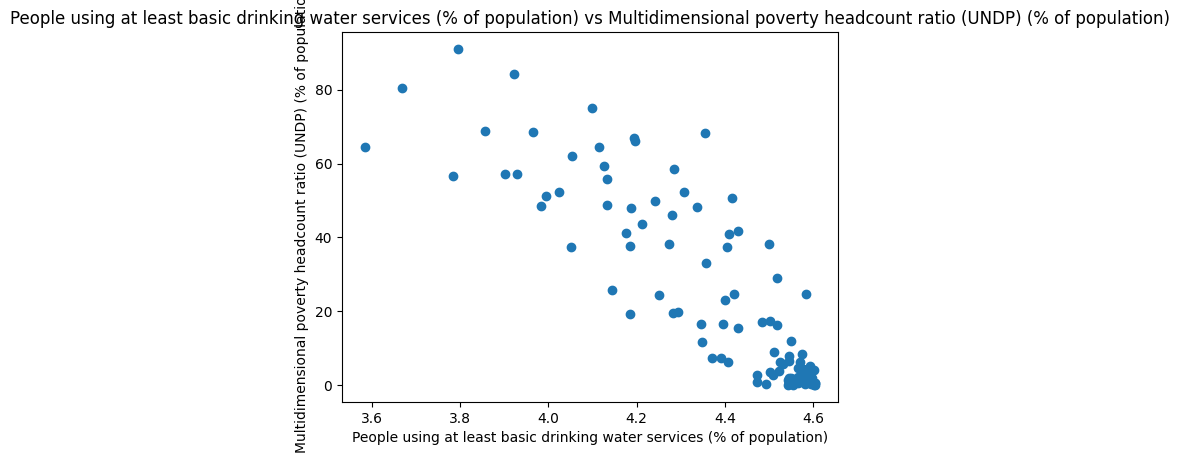

In [111]:
topic = "People using at least basic drinking water services (% of population)"
topic_2 = "Multidimensional poverty headcount ratio (UNDP) (% of population)"

plt.scatter(np.log(df_pivot[topic]), df_pivot[topic_2])
plt.xlabel(topic)
plt.ylabel(topic_2)
plt.title(f"{topic} vs {topic_2}")
plt.show()


In [43]:

# Define the topic of interest
topic = "Multidimensional poverty headcount ratio (World Bank) (% of population)"
topic_2 = "Multidimensional poverty headcount ratio (UNDP) (% of population)"

# Keep only the relevant columns
df_pivot["Poverty"] = df_pivot[topic].combine_first(df_pivot[topic_2])
# df_filtered = df_pivot[["Year", "Country Name", topic]].dropna()
df_filtered_2 = df_pivot[[ "Country Name", topic_2]].dropna()
# 
# Count the number of non-null values per year
# year_counts = df_filtered["Year"].value_counts()
# year_counts_2 = df_filtered_2["Year"].value_counts()
# 
# df_sorted = df_filtered.sort_values(by="Year", key=lambda x: x.map(year_counts), ascending=False)
df_sorted_2 = df_filtered_2.sort_values(by=topic_2)

print(df_sorted_2)
# print(df_sorted_2[28])


Indicator Name              Country Name  \
5011                              Serbia   
279                              Armenia   
5899                        Turkmenistan   
5988                             Ukraine   
2106                             Georgia   
259                            Argentina   
4338                     North Macedonia   
2921                              Jordan   
3114                     Kyrgyz Republic   
2943                          Kazakhstan   
1242                          Costa Rica   
6259                  West Bank and Gaza   
5819                 Trinidad and Tobago   
5731                            Thailand   
89                               Albania   
1315                                Cuba   
5850                             Tunisia   
3640                            Maldives   
5035                          Seychelles   
5803                               Tonga   
3924                             Moldova   
4002                          Mo